In [44]:
import pandas as pd
import wbgapi as wb
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns    # Allows for easy plotting of heatmaps

In [6]:
country_codes = ['EGY','NGA','ZAF','CHN','IND','JPN','ITA','ESP','FRA','DEU']

In [7]:
indicator_ids = ["EN.ATM.CO2E.PC","TX.VAL.FUEL.ZS.UN","SP.POP.GROW","AG.LND.ARBL.ZS","AG.LND.FRST.ZS"]
indicator_dict = {
    "EN.ATM.CO2E.PC" : "co2_emission",
    "TX.VAL.FUEL.ZS.UN" : "fuel_export",
    "SP.POP.GROW" : "pop_growth",
    "AG.LND.ARBL.ZS" : "arable_land",
    "AG.LND.FRST.ZS" : "forest_land",
}

In [8]:
wb.series.info(indicator_ids)

id,value
AG.LND.ARBL.ZS,Arable land (% of land area)
EN.ATM.CO2E.PC,CO2 emissions (metric tons per capita)
AG.LND.FRST.ZS,Forest area (% of land area)
TX.VAL.FUEL.ZS.UN,Fuel exports (% of merchandise exports)
SP.POP.GROW,Population growth (annual %)
,5 elements


In [9]:
# specicif time range
df = wb.data.DataFrame(indicator_ids, country_codes, time=range(2008, 2019))

In [10]:
country_df = df
country_df.reset_index()
country_df = country_df.reset_index(level=['economy', 'series'])
country_df = country_df.set_axis(['country','indicators','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018'], axis=1)
country_df = country_df.set_index('indicators')
country_df = country_df.rename(index=indicator_dict)
country_df = country_df.reset_index(level=['indicators'])
country_df = country_df.set_index(['country','indicators'])
country_df.head()

2008       2009       2010       2011       2012  \
country indicators                                                            
CHN     arable_land   12.922614  12.942968  12.877841  12.800417  12.728202   
        forest_land   20.784578  21.035087  21.285597  21.491096  21.696596   
        co2_emission   5.431610   5.795344   6.332166   6.898148   7.039788   
        pop_growth     0.512387   0.497381   0.482960   0.546458   0.678345   
        fuel_export    2.220806   1.696237   1.690563   1.700077   1.513750   

                           2013       2014       2015       2016       2017  \
country indicators                                                            
CHN     arable_land   12.707193  12.695893  12.689357  12.680817  12.678503   
        forest_land   21.902095  22.107595  22.313094  22.542877  22.742310   
        co2_emission   7.289017   7.212791   7.124223   7.071898   7.174948   
        pop_growth     0.666073   0.630326   0.581456   0.573051   0.605245   
        fuel_export    1.529470   1.470611   1.227266   1.281001   1.563557   

                           2018  
country indicators               
CHN     arable_land   12.678246  
        forest_land   22.941735  
        co2_emission   7.352263  
        pop_growth     0.467672  
        fuel_export    1.869449

In [28]:
years_df = country_df.reset_index(level=['country','indicators'])
years_df = years_df.set_index(['indicators','country'])
years_df = years_df.stack()
years_df = years_df.unstack('country')
years_df = years_df.swaplevel()
years_df = years_df.sort_index()
years_df.index = years_df.index.rename(['years','indicators'])
years_df.head()

country                   CHN        DEU        EGY        ESP        FRA  \
years indicators                                                            
2008  arable_land   12.922614  34.225397   2.654076  25.036087  33.364015   
      co2_emission   5.431610   9.615748   2.374803   7.053994   5.564429   
      forest_land   20.784578  32.693687   0.064648  36.597951  29.572812   
      fuel_export    2.220806   2.614730  44.413499   6.611119   5.069603   
      pop_growth     0.512387  -0.190143   1.778691   1.595330   0.558843   

country                   IND        ITA        JPN        NGA        ZAF  
years indicators                                                           
2008  arable_land   53.139894  25.491263  11.818930  39.526994  10.551567  
      co2_emission   1.185905   7.564248   9.055074   0.609105   8.568994  
      forest_land   23.246076  30.245060  68.444444  25.897419  14.415163  
      fuel_export   18.064889   4.612586   2.402803  91.743286   9.626525  
      pop_growth     1.464890   0.662469   0.048425   2.649868   1.334117

Text(0.5, 0, 'Years')

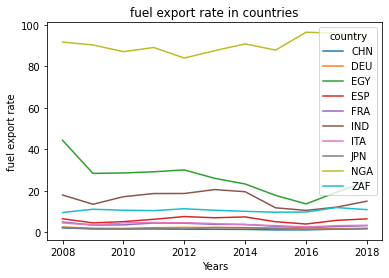

In [63]:
fuel_export_df = years_df.xs('fuel_export', level=1)
fuel_export_df.plot()
plt.title("fuel export rate in countries")
plt.ylabel("fuel export rate")
plt.xlabel("Years")

Text(0.5, 0, 'Countries')

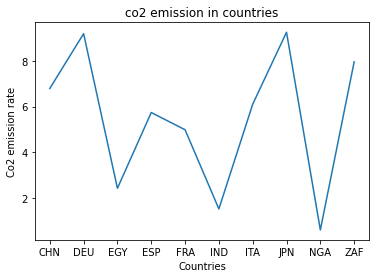

In [62]:
co2_df = years_df.xs('co2_emission', level=1).mean()
plt.plot(co2_df.index, co2_df.values)
plt.title("co2 emission in countries")
plt.ylabel("Co2 emission rate")
plt.xlabel("Countries")

In [34]:
# check for normalizationn within data
def cen_norm(dist):
    """ Centralises and normalises distribution dist. Uses numpy"""
    aver = np.average(dist)
    stdev = np.std(dist)
    dist = (dist-aver) / stdev
    return dist

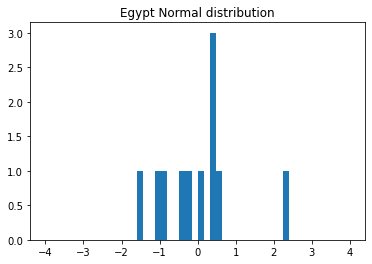

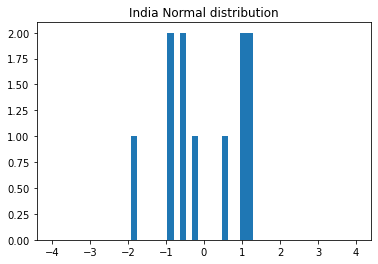

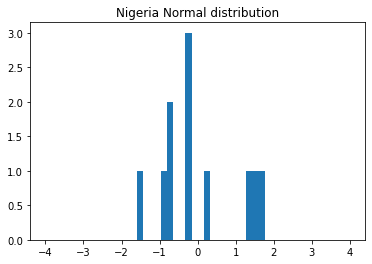

In [65]:
egy_norm = cen_norm(fuel_export_df["EGY"])
ind_norm = cen_norm(fuel_export_df["ITA"])
nga_norm = cen_norm(fuel_export_df["JPN"])

plt.figure()
plt.hist(egy_norm, bins=50, range=(-4.0, 4.0))
plt.title("Egypt Normal distribution")
plt.show()

plt.figure()
plt.hist(ind_norm, bins=50, range=(-4.0, 4.0))
plt.title("India Normal distribution")
plt.show()

plt.figure()
plt.hist(nga_norm, bins=50, range=(-4.0, 4.0))
plt.title("Nigeria Normal distribution")
plt.show()

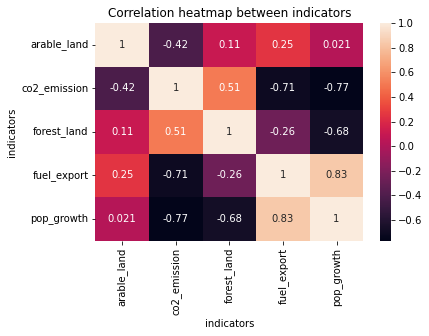

In [57]:
indicators_df = country_df.reset_index()
indicators_df = indicators_df.set_index(['country','indicators'])
indicators_df = indicators_df.stack()
indicators_df = indicators_df.unstack('indicators')
indicators_df = indicators_df.groupby(level=[0]).mean()

sns.heatmap(indicators_df.corr(), annot=True).set(title='Correlation heatmap between indicators')
plt.show()

In [46]:
# Test to see if co2_emission and forest_land are correlated
pearsonr(indicators_df["co2_emission"], indicators_df["forest_land"])

(0.5094793377465754, 0.13253074570557413)

[Text(0.5, 1.0, 'fuel_export to co2_emission')]

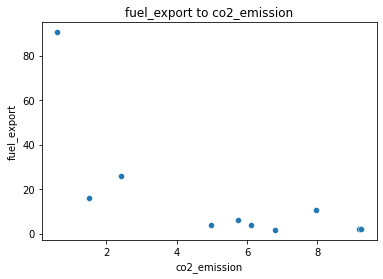

In [55]:
# line plots
import seaborn as sns
co2_vs_fuel_df = indicators_df.groupby(level=[0]).mean()
sns.scatterplot(x="co2_emission", y="fuel_export", data=co2_vs_fuel_df).set(title='fuel_export to co2_emission')

[Text(0.5, 1.0, 'fuel_export to population growth')]

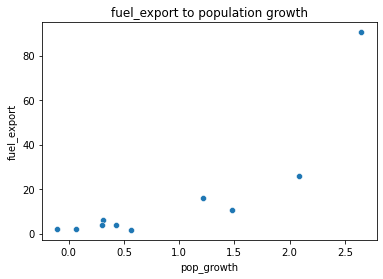

In [66]:
sns.scatterplot(x="pop_growth", y="fuel_export", data=co2_vs_fuel_df).set(title='fuel_export to population growth')